Using kaggle's pizza and steak database for this project.


In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2023-12-28 08:28:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.207, 209.85.146.207, 209.85.147.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   213MB/s    in 0.5s    

2023-12-28 08:28:57 (213 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zipr=zipfile.ZipFile("pizza_steak.zip")
zipr.extractall()
zipr.close()

Have used combination of convolution layers and Maxpool2d (2d cause 2 dimension data model is been made) with sigmoid as outer layer.


In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
test_dir="pizza_steak/test"
train_dir="pizza_steak/train"
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
model_1=tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
      tf.keras.layers.Conv2D(10,3,activation="relu")
      ,
     tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")
     ]
)
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 15s 169ms/step - loss: 0.5937 - accuracy: 0.6760 - val_loss: 0.5012 - val_accuracy: 0.7440
Epoch 2/10
47/47 [==============================] - 6s 125ms/step - loss: 0.4831 - accuracy: 0.7760 - val_loss: 0.3850 - val_accuracy: 0.8460
Epoch 3/10
47/47 [==============================] - 7s 147ms/step - loss: 0.4212 - accuracy: 0.8053 - val_loss: 0.3671 - val_accuracy: 0.8360
Epoch 4/10
47/47 [==============================] - 6s 124ms/step - loss: 0.3857 - accuracy: 0.8307 - val_loss: 0.3208 - val_accuracy: 0.8600
Epoch 5/10
47/47 [==============================] - 7s 149ms/step - loss: 0.4013 - accuracy: 0.8273 - val_loss: 0.3299 - val_accuracy: 0.8560
Epoch 6/10
47/47 [==============================] - 7s 139ms/step - loss: 0.3681 - accuracy: 0.8507 - val_loss: 0.3073 - val_accuracy: 0.8680
Epoch 7/10
47/47 [==============================] - 7s 146ms/ste

binary_crossentropy as only two kinds of datasets been made model on.
accuracy is 90%


In [5]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

Random sample taken from internet


In [15]:
import matplotlib.image as mpimg
class_names=['pizza','steak']
!wget https://images4.alphacoders.com/644/644372.jpg


--2023-12-28 08:36:13--  https://images4.alphacoders.com/644/644372.jpg
Resolving images4.alphacoders.com (images4.alphacoders.com)... 104.20.15.194, 104.20.14.194, 172.67.3.36, ...
Connecting to images4.alphacoders.com (images4.alphacoders.com)|104.20.15.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336650 (329K) [image/jpeg]
Saving to: ‘644372.jpg’

644372.jpg          100%[===================>] 328.76K  --.-KB/s    in 0.03s   

2023-12-28 08:36:13 (9.71 MB/s) - ‘644372.jpg’ saved [336650/336650]



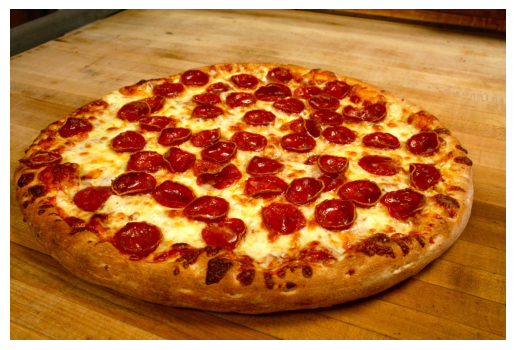

In [16]:
import matplotlib.pyplot as plt
sampled=mpimg.imread("PIZZA.jpg")
plt.imshow(sampled)
plt.axis(False);


In [17]:

t=tf.image.resize(sampled,size=[224,224])
import numpy as np

In [18]:
exp=tf.expand_dims(t,axis=0)
k=model_1.predict(exp)
k
if (k==0):
  print("pizza")
else:
  print("steak")

1/1 [==============================] - 0s 38ms/step
pizza
